In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.preprocessing.image import image 
#import tensorflow as tf
#import matplotlib.pyplot as plt
#import cv2
#import os 
#import numpy as np 

In [ ]:
import numpy 
import cv2

In [ ]:
import os 
import random 
import matplotlib.pyplot as plt
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
DIRECTORY = '/content/drive/MyDrive/mam_4thsem'
CATEGORIES = ['augmine1','augmine2','augmine4','augmine5','augmine6','augmine7','augmine8','augmine9','augmine10','augmine11','augmine12','augmine13']


/content/drive/MyDrive/mam_4thsem/augmine1
/content/drive/MyDrive/mam_4thsem/augmine2
/content/drive/MyDrive/mam_4thsem/augmine4
/content/drive/MyDrive/mam_4thsem/augmine5
/content/drive/MyDrive/mam_4thsem/augmine6
/content/drive/MyDrive/mam_4thsem/augmine7
/content/drive/MyDrive/mam_4thsem/augmine8
/content/drive/MyDrive/mam_4thsem/augmine9
/content/drive/MyDrive/mam_4thsem/augmine10


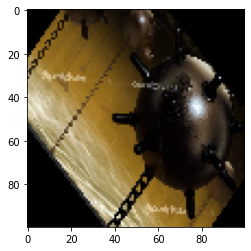

In [ ]:
IMG_SIZE = 100
data = [] 
for category in CATEGORIES:
  folder = os.path.join(DIRECTORY,category)
  print(folder)
  label = CATEGORIES.index(category)
  for img in os.listdir(folder):
    img_path = os.path.join(folder,img)
    img_arr = cv2.imread(img_path)
    try:
      img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    except:
      continue
    plt.imshow(img_arr)
    data.append([img_arr, label])

In [ ]:
random.shuffle(data)

In [ ]:
X = []
y = []
for features,label in data:
  X.append(features)
  y.append(label)

In [ ]:
import numpy as np
X=np.array(X)
y=np.array(y)

In [ ]:
len(X)
#len(y)

1971

In [ ]:
len(y)

1971

In [ ]:
pickle.dump(X,open('X.pkl','wb'))
pickle.dump(y,open('y.pkl','wb'))

In [ ]:
X = pickle.load(open('X.pkl','rb'))
y = pickle.load(open('y.pkl','rb'))

In [ ]:
X = X/255


In [ ]:
X

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [ ]:
X.shape

(1971, 100, 100, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
###############1##############################

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(9, activation ='softmax'))


In [ ]:
model.compile(optimizer = 'RMSProp', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X,y, epochs = 10, validation_split = 0.1)

Epoch 1/10
56/56 [==============================] - 2s 22ms/step - loss: 2.8623 - accuracy: 0.5640 - val_loss: 1.6755 - val_accuracy: 0.4697
Epoch 2/10
56/56 [==============================] - 1s 18ms/step - loss: 0.5955 - accuracy: 0.7851 - val_loss: 0.8529 - val_accuracy: 0.7626
Epoch 3/10
56/56 [==============================] - 1s 18ms/step - loss: 0.5511 - accuracy: 0.8387 - val_loss: 0.3966 - val_accuracy: 0.8182
Epoch 4/10
56/56 [==============================] - 1s 18ms/step - loss: 0.2923 - accuracy: 0.9007 - val_loss: 0.2867 - val_accuracy: 0.8838
Epoch 5/10
56/56 [==============================] - 1s 18ms/step - loss: 0.2230 - accuracy: 0.9272 - val_loss: 0.8640 - val_accuracy: 0.7323
Epoch 6/10
56/56 [==============================] - 1s 18ms/step - loss: 0.1634 - accuracy: 0.9447 - val_loss: 0.5341 - val_accuracy: 0.8131
Epoch 7/10
56/56 [==============================] - 1s 18ms/step - loss: 0.2396 - accuracy: 0.9413 - val_loss: 0.5876 - val_accuracy: 0.8283
Epoch 8/10
56

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


In [ ]:
print(acc)
print(val_acc)

[0.2019176483154297, 0.4404963254928589, 0.5730400681495667, 0.6091370582580566, 0.6627185344696045, 0.720812201499939, 0.7507050037384033, 0.7636773586273193, 0.793006181716919, 0.796954333782196]
[0.20202019810676575, 0.5909090638160706, 0.46464645862579346, 0.469696968793869, 0.5808081030845642, 0.6212121248245239, 0.6717171669006348, 0.6969696879386902, 0.691919207572937, 0.747474730014801]


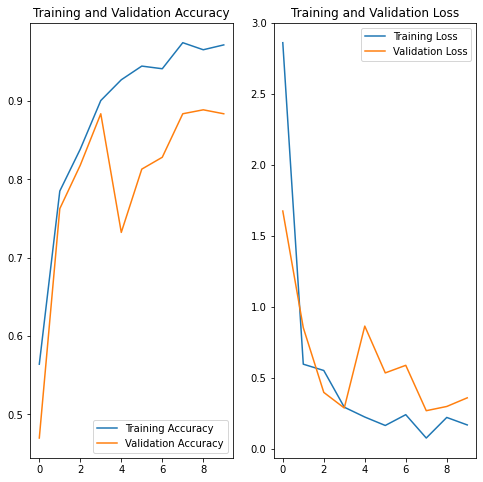

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_path = '/content/drive/MyDrive/mam_4thsem/images.jpg'
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
import tensorflow as tf
#img = tf.keras.utils.load_img(
 #   sunflower_path, target_size=(IMG_SIZE, IMG_SIZE)
#)
#try:
img_arr = cv2.imread(img_path)
img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
#except:
 # continue
#img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_arr, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(CATEGORIES[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to augmine5 with a 25.36 percent confidence.


In [ ]:
##############################################################2########################
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(9, activation ='softmax'))


In [ ]:
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X,y, epochs = 10, validation_split = 0.1)

Epoch 1/10
56/56 [==============================] - 1s 21ms/step - loss: 0.3643 - accuracy: 0.8725 - val_loss: 0.3843 - val_accuracy: 0.8434
Epoch 2/10
56/56 [==============================] - 1s 17ms/step - loss: 0.2967 - accuracy: 0.8928 - val_loss: 0.5546 - val_accuracy: 0.7828
Epoch 3/10
56/56 [==============================] - 1s 17ms/step - loss: 0.2777 - accuracy: 0.9109 - val_loss: 0.3100 - val_accuracy: 0.8788
Epoch 4/10
56/56 [==============================] - 1s 17ms/step - loss: 0.2613 - accuracy: 0.9109 - val_loss: 0.4864 - val_accuracy: 0.8030
Epoch 5/10
56/56 [==============================] - 1s 18ms/step - loss: 0.2629 - accuracy: 0.9092 - val_loss: 0.3644 - val_accuracy: 0.8737
Epoch 6/10
56/56 [==============================] - 1s 17ms/step - loss: 0.2315 - accuracy: 0.9126 - val_loss: 0.5296 - val_accuracy: 0.8384
Epoch 7/10
56/56 [==============================] - 1s 17ms/step - loss: 0.2127 - accuracy: 0.9334 - val_loss: 0.4677 - val_accuracy: 0.8384
Epoch 8/10
56

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

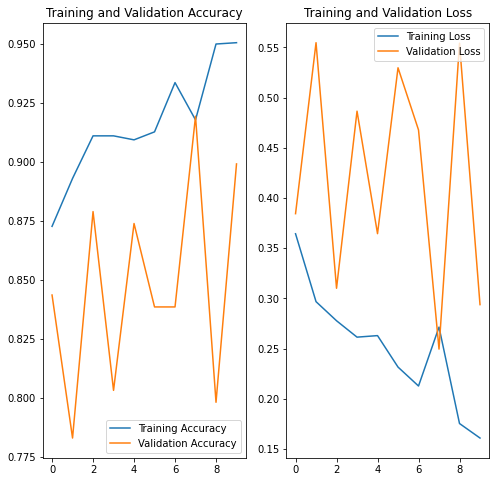

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
###################333333333333333333#######################

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(9, activation ='softmax'))


In [ ]:
model.compile(optimizer = 'Adagrad', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X,y, epochs = 10, validation_split = 0.1)

Epoch 1/10
56/56 [==============================] - 2s 21ms/step - loss: 2.0781 - accuracy: 0.1619 - val_loss: 1.9957 - val_accuracy: 0.2576
Epoch 2/10
56/56 [==============================] - 1s 17ms/step - loss: 1.8146 - accuracy: 0.3813 - val_loss: 1.7089 - val_accuracy: 0.4747
Epoch 3/10
56/56 [==============================] - 1s 17ms/step - loss: 1.4636 - accuracy: 0.5510 - val_loss: 1.4814 - val_accuracy: 0.4646
Epoch 4/10
56/56 [==============================] - 1s 17ms/step - loss: 1.1750 - accuracy: 0.6261 - val_loss: 1.4077 - val_accuracy: 0.4798
Epoch 5/10
56/56 [==============================] - 1s 17ms/step - loss: 1.0064 - accuracy: 0.6858 - val_loss: 1.0948 - val_accuracy: 0.6717
Epoch 6/10
56/56 [==============================] - 1s 17ms/step - loss: 0.9012 - accuracy: 0.7061 - val_loss: 1.3112 - val_accuracy: 0.5354
Epoch 7/10
56/56 [==============================] - 1s 17ms/step - loss: 0.8118 - accuracy: 0.7439 - val_loss: 1.0651 - val_accuracy: 0.6364
Epoch 8/10
56

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

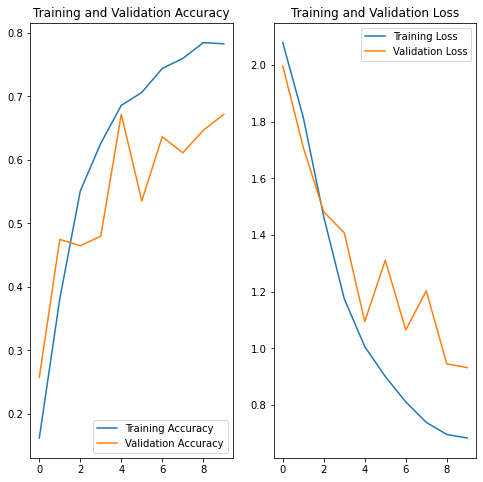

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_path = '/content/drive/MyDrive/mam_4thsem/images.jpg'
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
import tensorflow as tf
#img = tf.keras.utils.load_img(
 #   sunflower_path, target_size=(IMG_SIZE, IMG_SIZE)
#)
#try:
img_arr = cv2.imread(img_path)
img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
#except:
 # continue
#img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_arr, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(CATEGORIES[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to augmine10 with a 25.36 percent confidence.


In [ ]:
##################444444444444444###################referotherdrive ###################################

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(9, activation ='softmax'))